In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')


# defining dir variables
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/archive (2).zip'  # Replace with the actual path of your zip file

# Specify the directory where you want to extract the contents of the zip file
extract_folder_path = '/content/drive/MyDrive'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

# List the contents of the extracted folder
extracted_files = os.listdir(extract_folder_path)
print("Contents of the extracted folder:", extracted_files)



Contents of the extracted folder: ['How to get started with Drive.pdf', 'personal_view.pdf', 'A974169A-E684-40BD-9577-3B4D079D39F4.png', 'kaggle_survey_2021_responses.csv', 'HM 101 2021362.docx', 'Classroom', 'F3BFCA22-7652-42D1-A6E3-F3C778CF0C39.png', '534D4824-BF17-4569-BEF8-B2B3C7656ABF.jpeg', 'Colab Notebooks', 'AI-211_Semester_Project', 'AI-211_Semester_Project|', 'Titanic Survival', 'my_model', '(1) PowerPoint _ Microsoft Teams - Google Chrome 2023-05-12 00-13-08.mp4', 'Untitled document (1).gdoc', 'Untitled document.gdoc', 'Attendance1.gsheet', 'Untitled spreadsheet.gsheet', 'Contact Information.gform', 'Untitled form.gform', 'AIAA Jacket members (Responses).gsheet', 'AIAA Jacket members.gform', 'eng-fra.txt', 'anime-dataset-2023.csv', '2021362_t2.c', '2021362_Task1.c', '@article{kaggle2022, \xa0title = {{Kaggle ML & DS Survey 2022}}, \xa0author = {Kaggle}, \xa0journal = {Kaggle Blog}, \xa0year = {20~MIT Press}, \xa0year = {2016} }use these references and make me a literature re

In [3]:
root_dir = '/content/drive/MyDrive/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'test/'

In [4]:
target_var = os.listdir(train_dir)
target_var

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

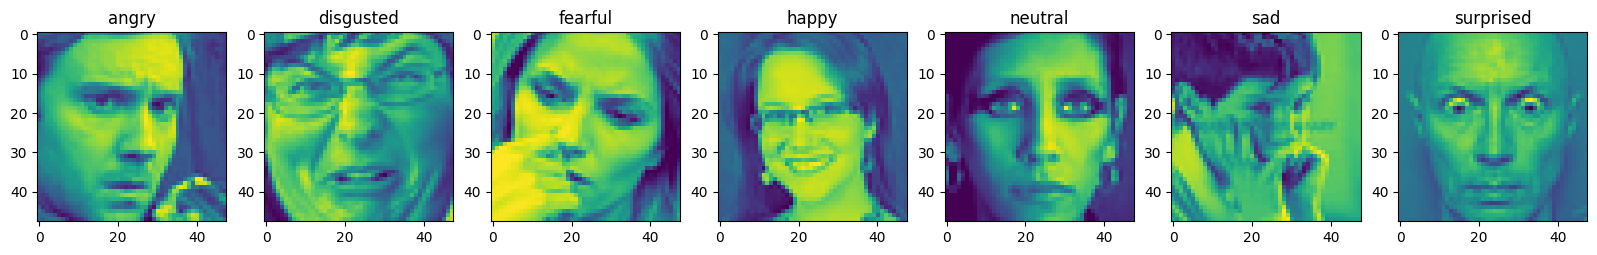

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 7, figsize=(20,8))
for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

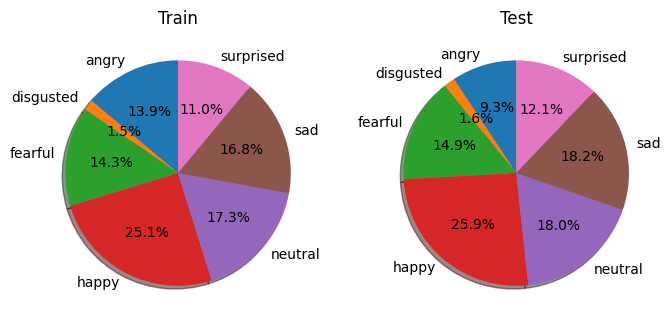

Emotion : angry
	Training : 3995
	 Testing : 639
Emotion : disgusted
	Training : 436
	 Testing : 111
Emotion : fearful
	Training : 4097
	 Testing : 1024
Emotion : happy
	Training : 7215
	 Testing : 1774
Emotion : neutral
	Training : 4965
	 Testing : 1233
Emotion : sad
	Training : 4830
	 Testing : 1247
Emotion : surprised
	Training : 3171
	 Testing : 831


In [6]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))



In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 6859 images belonging to 7 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [9]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                       

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    train ,
    validation_data=valid,
    epochs=50)

Epoch 1/50
315/315 [==============================] - 63s 144ms/step - loss: 2.3701 - accuracy: 0.2056 - val_loss: 1.8073 - val_accuracy: 0.2828
Epoch 2/50
315/315 [==============================] - 45s 142ms/step - loss: 1.8764 - accuracy: 0.2777 - val_loss: 1.8342 - val_accuracy: 0.2708
Epoch 3/50
315/315 [==============================] - 43s 137ms/step - loss: 1.6699 - accuracy: 0.3502 - val_loss: 1.4835 - val_accuracy: 0.4213
Epoch 4/50
315/315 [==============================] - 43s 136ms/step - loss: 1.5266 - accuracy: 0.4042 - val_loss: 1.3965 - val_accuracy: 0.4589
Epoch 5/50
315/315 [==============================] - 44s 138ms/step - loss: 1.4393 - accuracy: 0.4430 - val_loss: 1.3222 - val_accuracy: 0.4866
Epoch 6/50
315/315 [==============================] - 52s 164ms/step - loss: 1.3760 - accuracy: 0.4734 - val_loss: 1.2688 - val_accuracy: 0.5094
Epoch 7/50
315/315 [==============================] - 44s 139ms/step - loss: 1.3137 - accuracy: 0.4981 - val_loss: 1.3161 - val_ac

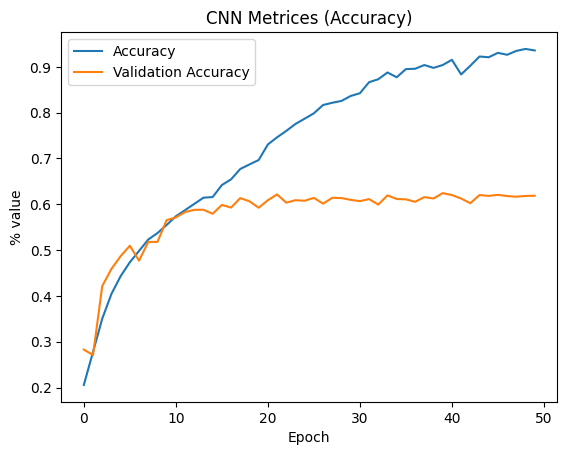

In [11]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

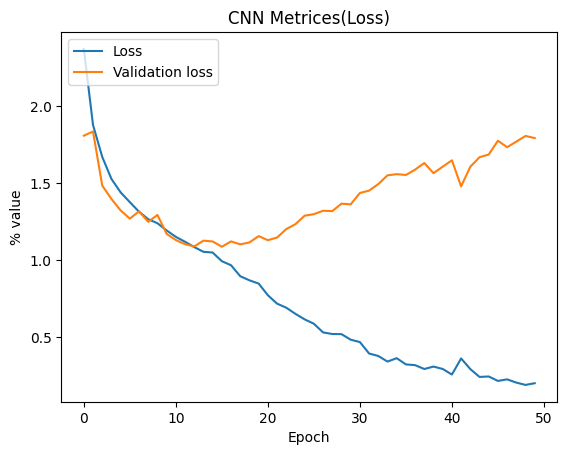

In [12]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [13]:
y_pred = model.predict(test)

108/108 [==============================] - 10s 94ms/step


In [14]:
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

In [15]:
y_actual = test.classes[test.index_array]

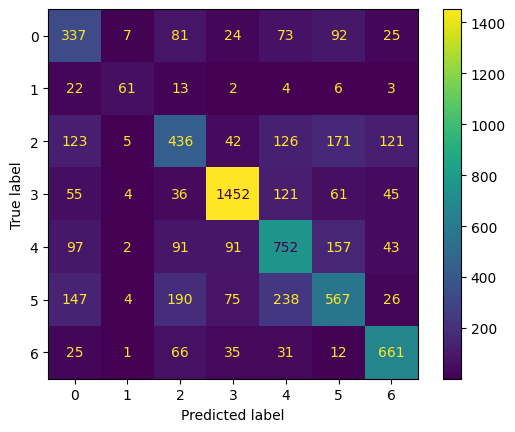

In [16]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.4181    0.5274    0.4664       639
           1     0.7262    0.5495    0.6256       111
           2     0.4775    0.4258    0.4502      1024
           3     0.8437    0.8185    0.8309      1774
           4     0.5591    0.6099    0.5834      1233
           5     0.5319    0.4547    0.4903      1247
           6     0.7154    0.7954    0.7533       831

    accuracy                         0.6220      6859
   macro avg     0.6103    0.5973    0.6000      6859
weighted avg     0.6241    0.6220    0.6210      6859



In [20]:
!pip show keras


Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


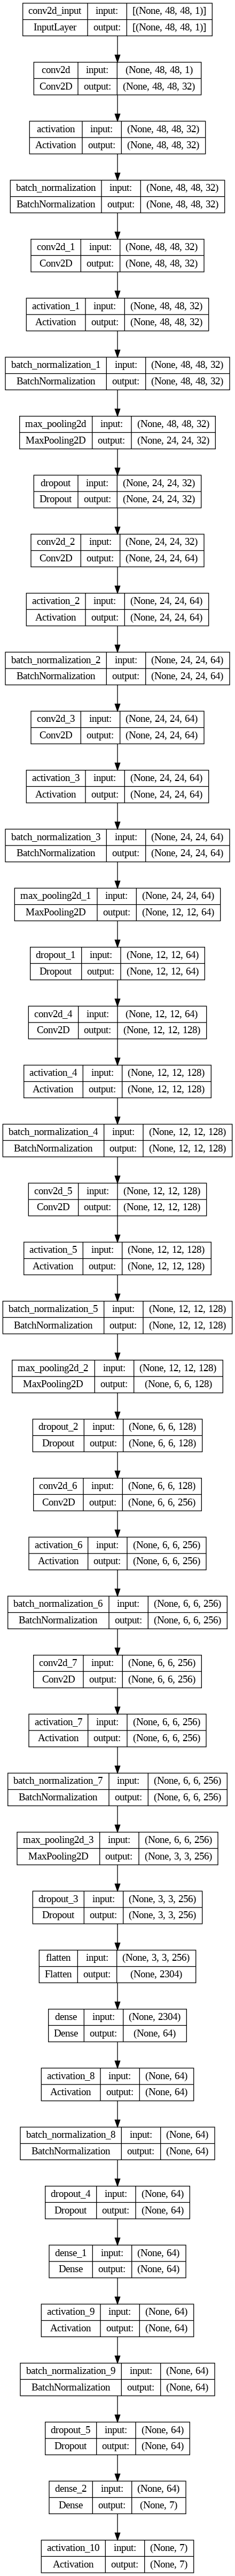

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
